# **[LS22] UC Berkeley Admission Rate**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR ONLY: SPLIT 2 (9.1, 10.1, 11.2)

**INSTRUCTOR ONLY - TODOs**
- Tie in course concepts better
    - More short answer / brief response questions in between coding
    - ...
- Simplify coding tasks / more scaffolding
    - Consider some students could be not in/currently taking D8
    - Some tasks are currently Data 100 level
    - Heightened difficulty do to `pandas` (not introduced in D8)
- Structural changes:
    - Have closing/concluding thoughts as **Question 4**
    - Have modeling portion as **Question 5**, potentially as bonus
- More situational/hypothetical questions towards the end
- Figure out how to tie in modeling

**INSTRUCTOR ONLY - "NEW" Data Science Takeaways**
- How does incomplete EDA lead to false analysis
- Simpson's Paradox
- Forgetting to consider majors tied with base rate neglect

# Part 2: Exploratory Data Analysis (EDA) and Observations


## Takeaways
In this lab, we aim to prepare students for utilizing data science and decision making skillsets with the UC Berkeley 1973 Graduate Admission
Rate dataset. The objectives of this lab are as follows:


- **Heuristics**:
  - Understand and apply heuristics in decision-making, while identifying and avoiding biases like Base Rate Neglect, Representativeness Heuristic, Conjunction Fallacy, and Availability Heuristic.
  - Learn the fundamentals of Bayesian reasoning to enhance judgment and decision-making skills.

- **Confirmation Bias**:
  - Be aware of the tendency to favor existing beliefs, even against evidence.
  - Learn about selective exposure and biased assimilation, and how to mitigate confirmation bias by seeking counter-evidence.

- **When is Science Suspect**:
  - Recognize the potential to use science for social and political ends.
  - Be cautious of science that studies human groups and subsequent validation of societal power structures.
  - Recognize one's own involvement in the social dynamic to the assessment of any study of human groups.

A university's admission is related to the different aspects of the society, and often becomes a good reflection on societal's values and dynamic. For this part of the assignment, we will be working with a segment of **UC Berkeley's 1973 graduate admission data** to further explore how gender (recorded binary: Female and Male during 1973) plays a role in admission.

In *Part 1: Observation and Instrumentation*, we explored the data from a less objective lens by making obsersvations, claims, and credence levels to what we thought the dataset represented simply by taking glances at the raw data. In this part, we will get the chance to really dive into the data by performing Exploratory Data Analysis.

Exploratory Data Analysis, or EDA for short, is the process of analyzing/summarizing data to extract valuable insights and patterns that can help guide further analysis. EDA is usually performed at the beginning of a data science project and helps to guide the direction of the analysis. EDA allows us to gain an understanding of the data, identify any patterns or anomalies, and detect any potential issues that may affect the analysis. In the following problems, we will perform EDA on our admission rates dataset.

## **Question 1: Exploring the Data**

Let's jog our memories from *Part 1* and perform EDA on our data.

**Question 1.1)** Like last lab, load the *```berkeley.csv```* dataset below.

In [71]:
# ONLY RUN IF ON GOOGLE COLAB
# Sync Google Drive to get CSV file
## from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
berkeley = ...
berkeley.head(15)

In [20]:
# Instructor_only / Solution

berkeley = pd.read_csv('berkeley.csv')
berkeley.head(15)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


In [ ]:
# INSTRUCTOR_ONLY
# Data Collection and Trustworthiness:
# Explore the origins of the data (e.g., Berkeley dataset), its collection process, and its validity.
# Discuss factors that could affect data collection and responses.
# Consider watching an associated video to deepen understanding.

As we saw in *Part 1*, only using our senses can be very limiting in our ability to accurately describe the story that our dataset is trying to tell. Thus, let's utilize instruments such as `pandas`, `numpy`, and `matplotlib` to paint a better picture!

**Question 1.2)** Using *`berkeley.csv`*, calculate the admission rates of Female vs. Male applicants. Note that `female_admission_rate` and `male_admission_rate` should have `float` values. *Hint: Conditional expressions may be useful here*

In [ ]:
...

female_admission_rate = ...
male_admission_rate = ...

print(f"Admission rate for female applicants: {female_admission_rate}\nAdmission rate for male applicants: {male_admission_rate}")

Admission rate for female applicants: Ellipsis
Admission rate for male applicants: Ellipsis


In [21]:
# Instructor_only / Solution

total_f = (berkeley["Gender"] == "F").sum()
total_m = (berkeley["Gender"] == "M").sum()

accepted_f = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "F")].shape[0]
accepted_m = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "M")].shape[0]

female_admission_rate = (accepted_f / total_f)
male_admission_rate = (accepted_m / total_m)

print(f"Admission rate for female applicants: {female_admission_rate}\nAdmission rate for male applicants: {male_admission_rate}")

Admission rate for female applicants: 0.3457532978477204
Admission rate for male applicants: 0.4427860696517413


**Question 1.3)** Using the `berkeley` dataframe, create a pivot table `admissions_by_gender` that displays the totals for accepted and rejected admissions per gender.

In [ ]:
admissions_by_gender = ...
admissions_by_gender

Ellipsis

In [22]:
# Instructor_only / Solution

admissions_by_gender = pd.pivot_table(berkeley, index = "Gender", columns = "Admission", aggfunc="size")
admissions_by_gender

Admission,Accepted,Rejected
Gender,,
F,1494,2827
M,3738,4704


**Question 1.4)** In the same `admissions_by_gender` table, add a column `"Acceptance Rate"`, which contains the acceptance rates per row.

In [ ]:
admissions_by_gender["Acceptance Rate"] = ...
admissions_by_gender

Admission,Accepted,Rejected,Acceptance Rate
Gender,,,
F,1494,2827,Ellipsis
M,3738,4704,Ellipsis


In [23]:
# Instructor_only / Solution

admissions_by_gender["Acceptance Rate"] = [female_admission_rate, male_admission_rate]
admissions_by_gender

Admission,Accepted,Rejected,Acceptance Rate
Gender,,,
F,1494,2827,0.345753
M,3738,4704,0.442786


**Question 1.5)** Referring back to the results we obtained in all of question 1, what do we observe about the admissions trends between male and female applicants?

*Your Answer Here*

In [ ]:
# Instructor_only / Solution

# Answers may vary
# Something along the lines of male applicants having higher acceptance rates than female applicants, and there being more male applicants than female applicants

## **Question 2: Visualizing the Data**

**Question  2.1)** Using the `admissions_by_gender` table, create a `barh` plot comparing the acceptance rates between each gender. Don't forget to title your plot and label your axes!

In [ ]:
...

Ellipsis

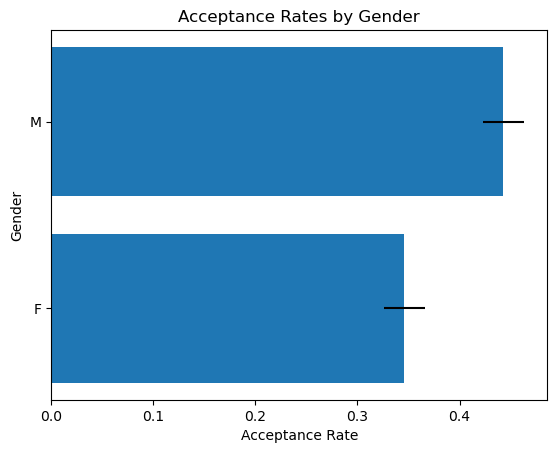

In [24]:
# Instructor_only / Solution

plt.barh(admissions_by_gender.index, admissions_by_gender["Acceptance Rate"], xerr=0.02)

plt.title("Acceptance Rates by Gender")
plt.xlabel("Acceptance Rate")
plt.ylabel("Gender")
plt.show()

**Question 2.2)** Using the same pivot table, create a stacked `bar` plot that visualizes this information. Your plot should clearly distinguish between accepted and rejected counts by stacking them within the same bar for each gender category. `matplotlib`'s `bar` documentation may be useful here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html.

In [ ]:
...

Ellipsis

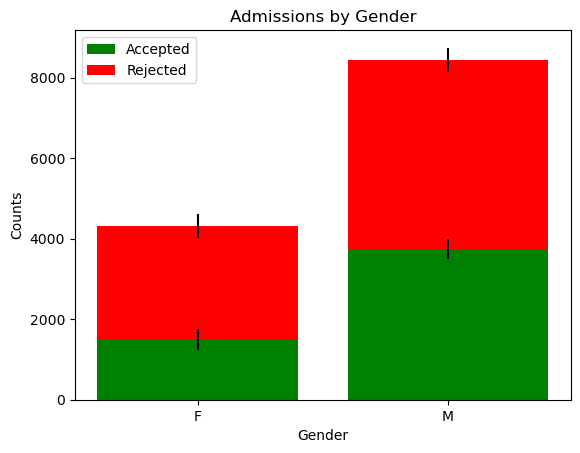

In [26]:
# Instructor_only / Solution

plt.bar(admissions_by_gender.index, admissions_by_gender['Accepted'], label='Accepted', color='green', yerr=250)
plt.bar(admissions_by_gender.index, admissions_by_gender['Rejected'], bottom=admissions_by_gender['Accepted'], label='Rejected', color='red', yerr=300)

plt.title('Admissions by Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend()
plt.show()

**Question 2.3)** Looking at the visualizations we just created, what observations can you make about the admission trends between male and female applicants?

*Your Answer Here*

In [ ]:
# Instructor_only / Solution

# ...

## **Question 3: Simpson's Paradox**

Now that we've explored the data with respect to gender and admission rates, let's take a look at how gender plays a role in admission rates. 

**Question 3.1)** Create a pivot table `admissions_by_major` that displays the totals for accepted and rejected admissions per major.

In [ ]:
admissions_by_major = ...
admissions_by_major

Ellipsis

In [15]:
# Instructor_only / Solution

admissions_by_major = pd.pivot_table(berkeley, index = "Major", columns = "Admission", aggfunc="size")
admissions_by_major

Admission,Accepted,Rejected
Major,,
A,914,332
B,370,215
C,321,597
D,269,523
E,147,437
F,47,667
Other,3164,4760


**Question 3.2)** Adding onto the `admissions_by_major` table, add a `"Counts"` column and an `"Acceptance Rate"` column, which shows the total amount of applicants and the acceptance rate for each major, respectively.

In [ ]:
admissions_by_major['Counts'] = ...
admissions_by_major["Acceptance Rate"] = ...
admissions_by_major

In [16]:
# Instructor_only / Solution

admissions_by_major['Counts'] = admissions_by_major['Accepted'] + admissions_by_major['Rejected']
admissions_by_major["Acceptance Rate"] = admissions_by_major['Accepted'] / admissions_by_major['Counts']
admissions_by_major

Admission,Accepted,Rejected,Counts,Acceptance Rate
Major,,,,
A,914,332,1246,0.733547
B,370,215,585,0.632479
C,321,597,918,0.349673
D,269,523,792,0.339646
E,147,437,584,0.251712
F,47,667,714,0.065826
Other,3164,4760,7924,0.399293


**Question 3.3)** Let's utilize data visualizations to help us really understand the data. Create a stacked `bar` plot similar to that of 2.2, plotting the stacked accepted and rejected counts of Majors A-F (excluding `"Other"`).

In [ ]:
...

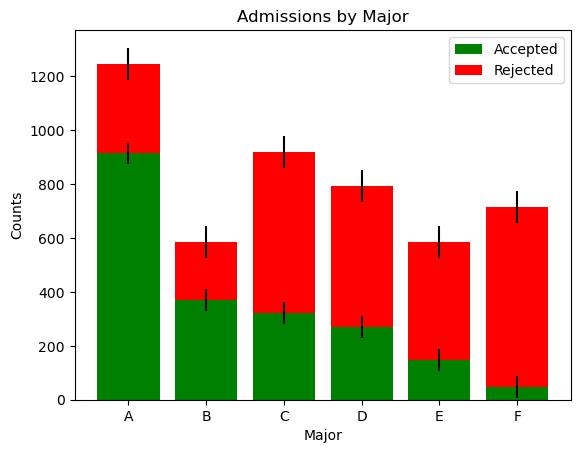

In [27]:
# Instructor_only / Solution

admissions_by_major_AF = admissions_by_major.drop(['Other'], axis=0)
plt.bar(admissions_by_major_AF.index, admissions_by_major_AF['Accepted'], label='Accepted', color='green', yerr=40)
plt.bar(admissions_by_major_AF.index, admissions_by_major_AF['Rejected'], bottom=admissions_by_major_AF['Accepted'], label='Rejected', color='red', yerr=60)

plt.title('Admissions by Major')
plt.xlabel('Major')
plt.ylabel('Counts')
plt.legend()
plt.show()

**Question 3.4)** Using the stacked `bar` plot and the `admissions_by_major` table, what observations can we make about the admission trends for each major? For reference, majors "A-F are the six majors with the most applicants in Fall 1973", which was stated here: https://discovery.cs.illinois.edu/dataset/berkeley/.

*Your Answer Here*

In [ ]:
# Instructor_only / Solution

# ...

Now that we'e explored Gender and Major separately, let's analyze admission rates taking both into account.

**Question 3.5)** Using the `berkeley` dataset, calculate the number of acceptances, rejections, total applicants, and acceptance rate for each combination of major and gender. Your resulting DataFrame whould have the following columns: Major, Gender, Accepted, Rejected, Counts, and Acceptance Rate.

In [ ]:
...

admissions_by_all = ...
admissions_by_all

In [9]:
def accepted_count(x):
    return (x == "Accepted").sum()

def rejected_count(x):
    return (x == "Rejected").sum()

In [10]:
# Instructor_only / Solution

grouped_data = berkeley.groupby(['Major', 'Gender'])

acceptance_counts = grouped_data['Admission'].apply(accepted_count).rename('Accepted')
rejection_counts = grouped_data['Admission'].apply(rejected_count).rename('Rejected')
applicant_counts = grouped_data.size().rename('Counts')

acceptance_rate = (acceptance_counts / applicant_counts).rename('Acceptance Rate')

admissions_by_all = pd.concat([acceptance_counts, rejection_counts, applicant_counts, acceptance_rate], axis=1)
admissions_by_all.reset_index(inplace=True)
admissions_by_all


,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,108,0.824074
1,A,M,825,313,1138,0.724956
2,B,F,17,8,25,0.680000
3,B,M,353,207,560,0.630357
4,C,F,201,392,593,0.338954
5,C,M,120,205,325,0.369231
6,D,F,131,244,375,0.349333
7,D,M,138,279,417,0.330935
8,E,F,94,299,393,0.239186
9,E,M,53,138,191,0.277487


**Question 3.6)** Construct a bar plot that visualizes the admission rates by gender within each major. We recommend using `seaborn` for this particular task, which was imported for you at the start.

In [77]:
...

Ellipsis

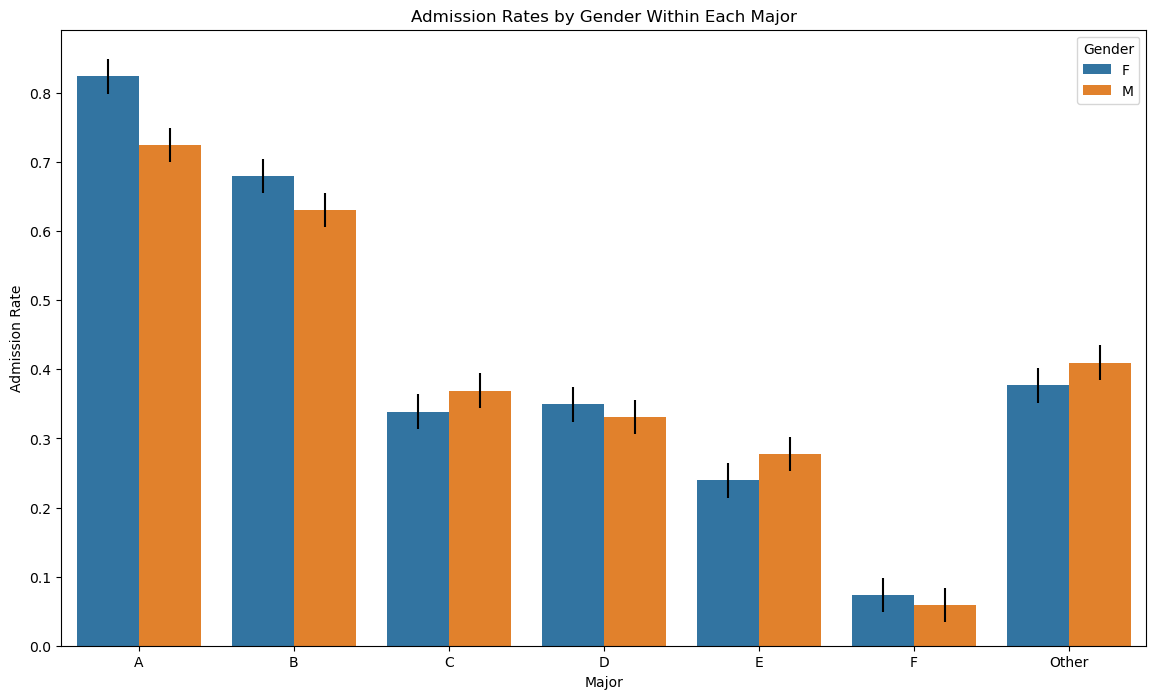

In [14]:
# Instructor_only / Solution

plt.figure(figsize=(14, 8))
sns.barplot(x='Major', y='Acceptance Rate', hue='Gender', data=admissions_by_all, yerr=0.02)
plt.title('Admission Rates by Gender Within Each Major')
plt.ylabel('Admission Rate')
plt.xlabel('Major')
plt.legend(title='Gender')
plt.show()

**Question 3.7)** Looking at the bar plot you made above, what do you conclude about the admission rates between male and female applicants? Is there any noticeable discrepency in the admission rates between male and female applicants, given the rates per major? How is it different from the observations you made in questions 1 and 2?

*Your Answer Here*

In [ ]:
# Instructor_only / Solution

# ...

**Question 3.8)** How can making premature observations and claims be harmful whem performing exploratory data analysis? What assumptions did you mistakenly make throughout this notebook?

*Your Answer Here*

In [ ]:
# Instructor_only / Solution

# ...

INSTRUCTOR ONLY: Continue with more visualizations then get into some predictive modeling so students can play around with Simpson's Paradox themselves

## **Question 4: Predictive Modeling**

To be completed... (Could be exploring other datasets that exhibit Simpson's Paradox, datasets with college application data, or some sort of modeling component)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('berkeley.csv')
data_encoded = pd.get_dummies(data, columns=['Major', 'Gender'], drop_first=True)
X = data_encoded.drop('Admission', axis=1)
y = data_encoded['Admission'].apply(lambda x: 1 if x == 'Accepted' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      2238
           1       0.70      0.24      0.35      1591

    accuracy                           0.64      3829
   macro avg       0.66      0.58      0.55      3829
weighted avg       0.66      0.64      0.58      3829



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print('Random Forest Classification Report:')
print(rf_report)


Random Forest Accuracy: 0.64
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      2238
           1       0.70      0.24      0.35      1591

    accuracy                           0.64      3829
   macro avg       0.66      0.58      0.55      3829
weighted avg       0.66      0.64      0.58      3829



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)  # Try different kernels like 'rbf' or 'poly'
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print(f'SVM Accuracy: {svm_accuracy:.2f}')
print('SVM Classification Report:')
print(svm_report)


SVM Accuracy: 0.64
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      2238
           1       0.70      0.24      0.35      1591

    accuracy                           0.64      3829
   macro avg       0.66      0.58      0.55      3829
weighted avg       0.66      0.64      0.58      3829



## **Question 5: Closing Thoughts**

To be completed... (Will mostly be short answer responses about more general implications of what we explored here; EX: what are the consequences of a data analyst performing incomplete EDA)

<br/>

<hr style="border: 1px solid #fdb515;" />

          /\\_/\\      
         / o o  \\     
        (   "    ))    
         \\~(*)~//     
          \\~~~//      
